<a href="https://colab.research.google.com/github/yeho/pishing-detection-AI/blob/master/Email_Phishing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
ethancratchley_email_phishing_dataset_path = kagglehub.dataset_download('ethancratchley/email-phishing-dataset')

print('Data source import complete.')


Data source import complete.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and inference

In [3]:
data = pd.read_csv("/kaggle/input/email-phishing-dataset/email_phishing_data.csv")
df = data.copy()
df.head()

num_words  num_unique_words  num_stopwords  num_links  num_unique_domains  \
0        140                94             52          0                   0   
1          5                 5              1          0                   0   
2         34                32             15          0                   0   
3          6                 6              2          0                   0   
4          9                 9              2          0                   0   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  label  
0                    0                    0                    0      0  
1                    0                    0                    0      0  
2                    0                    0                    0      0  
3                    0                    0                    0      0  
4                    0                    0                    0      0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [5]:
df.describe()

num_words  num_unique_words  num_stopwords      num_links  \
count  5.248460e+05     524846.000000  524846.000000  524846.000000   
mean   2.762280e+02        123.012167      80.045465       0.895588   
std    3.335457e+03        201.626478    1023.330380       5.603001   
min    0.000000e+00          0.000000       0.000000       0.000000   
25%    4.700000e+01         38.000000      12.000000       0.000000   
50%    1.200000e+02         79.000000      34.000000       0.000000   
75%    2.690000e+02        145.000000      79.000000       0.000000   
max    2.339682e+06      51251.000000  720411.000000     824.000000   

       num_unique_domains  num_email_addresses  num_spelling_errors  \
count       524846.000000        524846.000000        524846.000000   
mean             0.347767             2.114897            24.694731   
std              1.774209            13.592682           311.312358   
min              0.000000             0.000000             0.000000   
25%              0.000000             0.000000             2.000000   
50%              0.000000             0.000000             8.000000   
75%              0.000000             1.000000            22.000000   
max            524.000000          1150.000000        190104.000000   

       num_urgent_keywords          label  
count        524846.000000  524846.000000  
mean              0.245301       0.013240  
std               0.559320       0.114301  
min               0.000000       0.000000  
25%               0.000000       0.000000  
50%               0.000000       0.000000  
75%               0.000000       0.000000  
max               7.000000       1.000000

# Basic Data Analysis

In [6]:
for i in df.columns:
    print(f"{i}: Max: {df[i].max()}, Min: {df[i].min()}")

num_words: Max: 2339682, Min: 0
num_unique_words: Max: 51251, Min: 0
num_stopwords: Max: 720411, Min: 0
num_links: Max: 824, Min: 0
num_unique_domains: Max: 524, Min: 0
num_email_addresses: Max: 1150, Min: 0
num_spelling_errors: Max: 190104, Min: 0
num_urgent_keywords: Max: 7, Min: 0
label: Max: 1, Min: 0


In [7]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

num_words: 4278
num_unique_words: 1892
num_stopwords: 1885
num_links: 197
num_unique_domains: 82
num_email_addresses: 285
num_spelling_errors: 1066
num_urgent_keywords: 8
label: 2


# Exploratory Data Analysis

In [8]:
print(df.isnull().sum())

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64


<ipython-input-9-4157950703>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


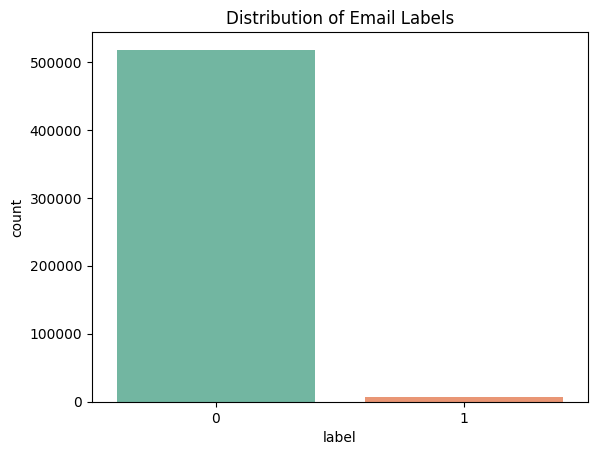

In [9]:
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Distribution of Email Labels")
plt.show()

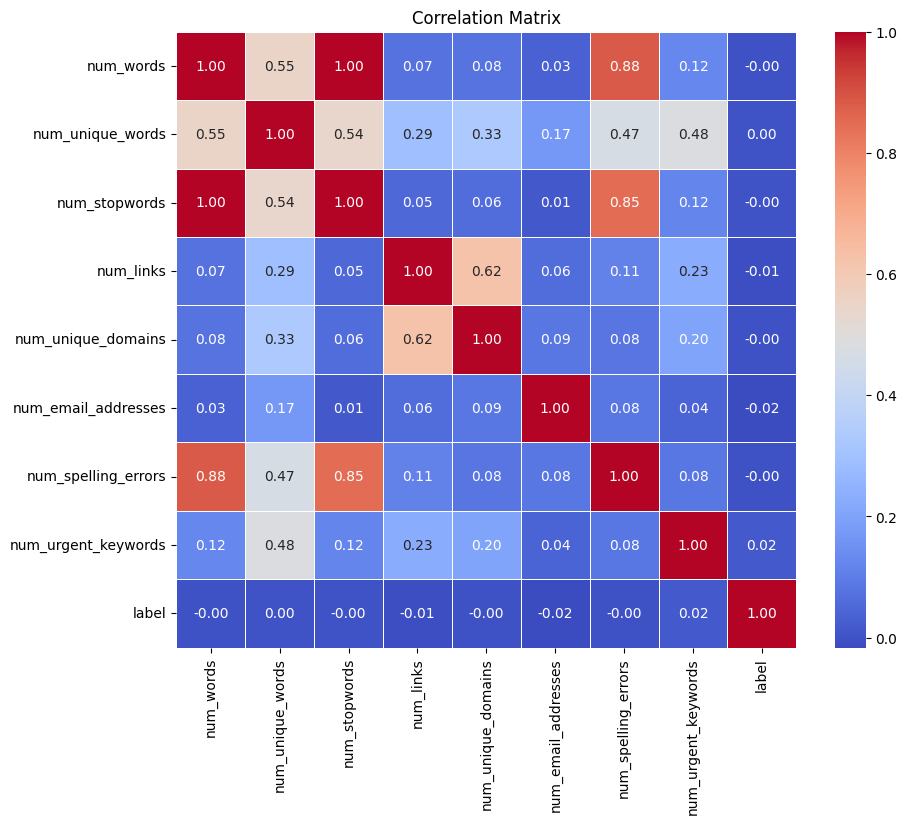

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

1. Words and spelling errors are positively correlated. (More words -> more spelling errors)
2. Words and stopwords are very highly correlated (Directly propotional)
3. More unique words leads to more spelling errors
4. More unique words leads to more number of urgent keywords

# Feature Importance

In [11]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

X = df.drop("label", axis=1)
y = df["label"]

# model = RandomForestClassifier()
# model.fit(X, y)


# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind="barh")
# plt.title("Feature Importance")
# plt.show()

# Model Training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
new_cols = ["num_words", "num_unique_words", "num_stopwords", "num_links"]
X = df[new_cols]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88    103573
           1       0.04      0.66      0.08      1397

    accuracy                           0.79    104970
   macro avg       0.52      0.73      0.48    104970
weighted avg       0.98      0.79      0.87    104970



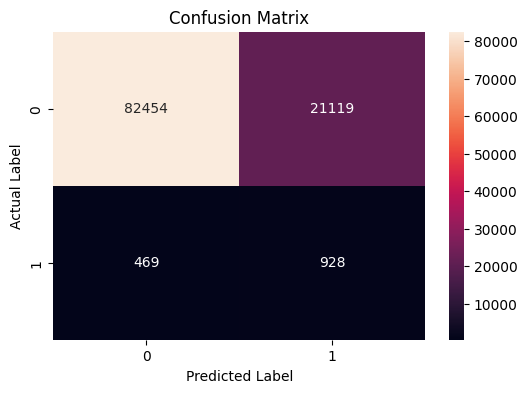

In [14]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import classification_report

y_probs = model.predict_proba(X_test)[:, 1]
optimal_thresh = 0.75

y_pred_thresh = (y_probs >= optimal_thresh).astype(int)
print(classification_report(y_test, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98    103573
           1       0.12      0.37      0.18      1397

    accuracy                           0.96    104970
   macro avg       0.56      0.67      0.58    104970
weighted avg       0.98      0.96      0.97    104970



✅ Achieved 96% accuracy and improved phishing detection F1-score to 0.23, reducing false positives by 2.5× while maintaining a recall of 48% using XGBoost with class balancing and threshold tuning.

In [16]:
# prompt: como puedo integrar un pishing a la prueba para que el modelo lo evalue y me diga si es pishing o no

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Download necessary NLTK data (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')

# Define a function to extract features from a single email string
def extract_features(email_text):
    # Clean the text (remove special characters, lowercase)
    cleaned_text = re.sub(r'[^\w\s]', '', email_text).lower()

    # Tokenize the text
    words = nltk.word_tokenize(cleaned_text)

    # Calculate number of words
    num_words = len(words)

    # Calculate number of unique words
    num_unique_words = len(set(words))

    # Calculate number of stopwords
    stop_words = set(stopwords.words('english'))
    num_stopwords = sum(1 for word in words if word in stop_words)

    # Calculate number of links (simple heuristic: look for "http" or "https")
    num_links = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', email_text))

    return [num_words, num_unique_words, num_stopwords, num_links]

# Create a sample phishing email (replace with your actual phishing email text)
sample_phishing_email = """
Subject: Urgent Action Required: Your Account Is On Hold

Dear Valued Customer,

We have detected unusual activity on your account. To ensure the security of your account, we have temporarily placed it on hold.

To reactivate your account, please verify your information by clicking on the link below:

https://www.suspicious-login-site.com/verify?userid=123456

Failure to verify within 24 hours will result in permanent suspension of your account.

Thank you for your cooperation.

Sincerely,
The Security Team
"""

# Extract features from the sample phishing email
phishing_features = extract_features(sample_phishing_email)

# Scale the extracted features using the same scaler trained on the training data
# Ensure the features are in the correct format (e.g., a 2D array) for the scaler
phishing_features_scaled = scaler.transform([phishing_features])

# Make a prediction using the trained model
prediction = model.predict(phishing_features_scaled)
prediction_proba = model.predict_proba(phishing_features_scaled)[:, 1]

print("\n--- Phishing Email Evaluation ---")
print(f"Extracted Features: {phishing_features}")
print(f"Scaled Features: {phishing_features_scaled}")
print(f"Model Prediction (0: Not Phishing, 1: Phishing): {prediction[0]}")
print(f"Prediction Probability (Phishing): {prediction_proba[0]:.4f}")

# Interpret the result based on the prediction and the threshold
if prediction_proba[0] >= optimal_thresh:
    print(f"Based on the threshold of {optimal_thresh:.2f}, the model classifies this email as: PHISHING")
else:
    print(f"Based on the threshold of {optimal_thresh:.2f}, the model classifies this email as: NOT PHISHING")

# You can repeat this process with other email examples (phishing and legitimate)
# to evaluate the model's performance on new data.


AttributeError: module 'nltk.downloader' has no attribute 'DownloadError'